In [56]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt
import waveguides as w
import scipy.constants as const

In [57]:
plt.rcParams['font.size'] = 16
plt.rcParams['font.family'] = 'serif'

In [58]:
open3 = np.array([5.5, 10.5, 15.5, 20.5, 25.5, 30.5, 35.5, 40.5, 45.5, 50.5])

In [59]:
shut3 = np.array([3.0, 8.0, 13.0, 18.0, 13.0, 18.0, 23.0, 28.0, 33.0, 38.0, 43.0, 48.0])

In [60]:
coax = [open3, shut3]

In [61]:
open75 = np.array([8.0, 12.4, 16.4])

In [62]:
shut75 = np.array([9.0, 13.1, 17.5])

In [63]:
open775 = np.array([10.1, 14.0, 17.5])

In [64]:
shut775 = np.array([8.5, 12.2, 15.8])

In [65]:
open8 = np.array([8.5, 11.6, 15.0])

In [66]:
shut8 = np.array([8.0, 11.4, 14.6, 18.0])

In [67]:
open825 = np.array([9.9, 13.0, 15.9])

In [68]:
shut825 = np.array([10.3, 13.2, 16.2])

In [69]:
open85 = np.array([8.4, 11.1, 14.0, 16.8])

In [70]:
shut85 = np.array([9.3, 12.0, 14.8, 17.7])

In [71]:
open9 = np.array([8, 10.7, 13.0, 15.0, 17.9])

In [72]:
shut9 = np.array([10.0, 12.7, 15.2, 17.6])

In [73]:
allwaves = [open75, shut75, open775, shut775, open8, shut8, open825, shut825, open85, shut85, open9, shut9]

In [74]:
allopen = [open75, open775, open8, open825, open85, open9]

In [75]:
allshorted = [shut75, shut775, shut8, shut825, shut85, shut9]

In [16]:
np.savez('waveguides', open3 = open3, shut3=shut3, open75=open75, shut75=shut75, open775=open775, shut775=shut775, open8=open8, shut8=shut8, open825=open825, shut825=shut825, open85=open85, shut85=shut85, open9=open9, shut9=shut9)

In [18]:
npz = np.load('waveguides.npz')

[  0.5  10. ]


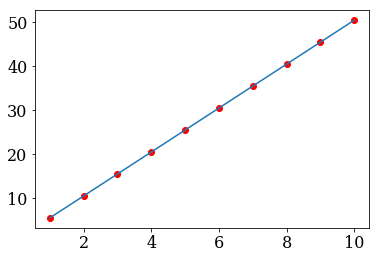

[-1.39393939  7.76223776]


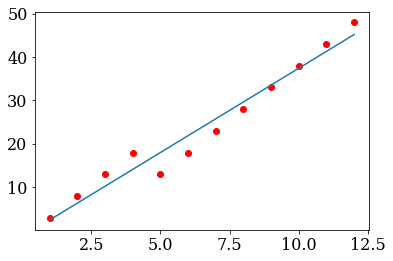

In [76]:
lambda3 = w.find_lambda(coax)

In [77]:
print('C-band Open Wavelength is:', lambda3[0], ' cm')
print('C-band Shorted Wavelength is:', lambda3[1], ' cm')

C-band Open Wavelength is: 10.0  cm
C-band Shorted Wavelength is: 7.76223776225  cm


In [78]:
3e9*np.array(lambda3)*0.01/const.c

array([ 1.00069229,  0.77676114])

# X-Band Waveguide

In [79]:
def lambdag(lambdafs, a):
    return lambdafs/(1-(lambdafs/(2*a))**2)**(0.5)

[ 3.86666667  8.4       ]


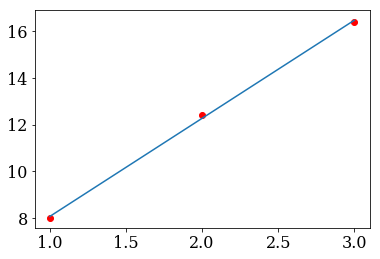

[ 4.7  8.5]


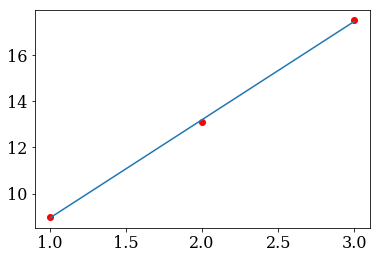

[ 6.46666667  7.4       ]


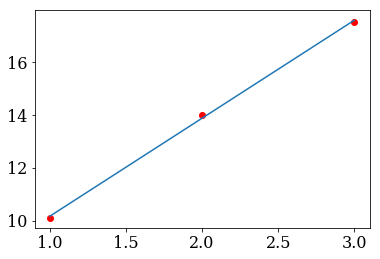

[ 4.86666667  7.3       ]


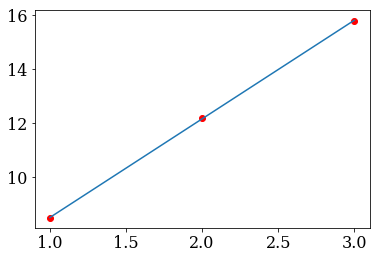

[ 5.2  6.5]


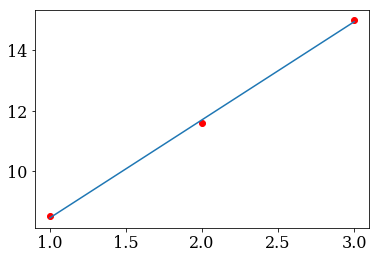

[ 4.7   6.64]


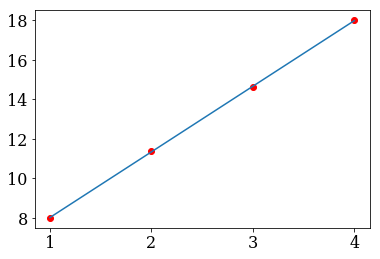

[ 6.93333333  6.        ]


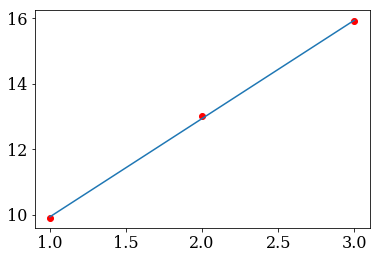

[ 7.33333333  5.9       ]


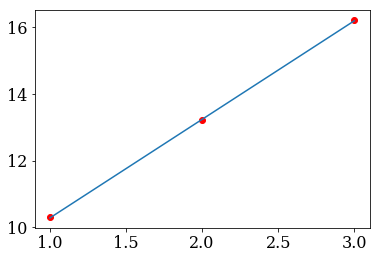

[ 5.55  5.62]


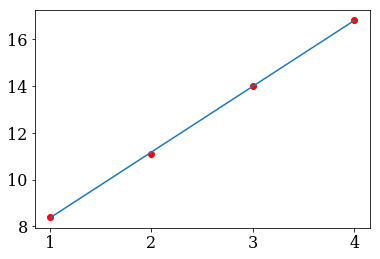

[ 6.45  5.6 ]


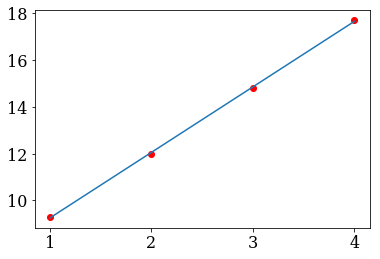

[ 5.69  4.82]


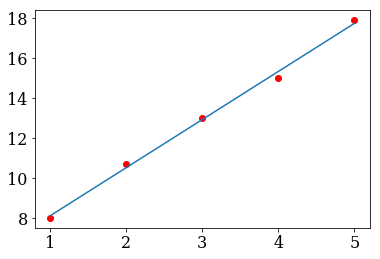

[ 7.55  5.06]


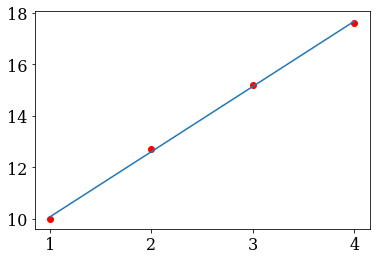

In [80]:
xlambdas = w.find_lambda(allwaves)

[ 3.86666667  8.4       ]


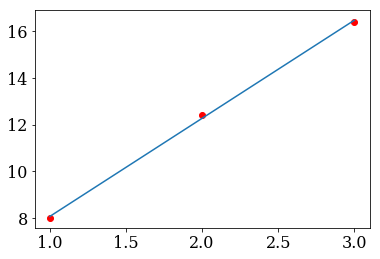

[ 6.46666667  7.4       ]


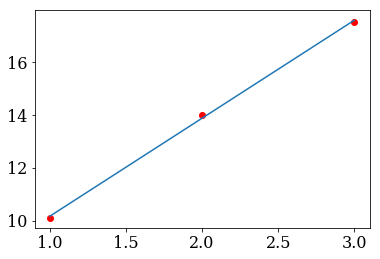

[ 5.2  6.5]


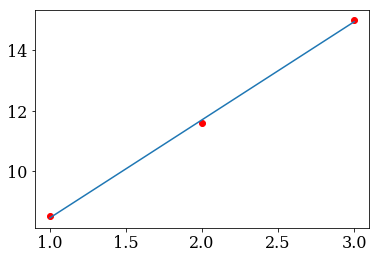

[ 6.93333333  6.        ]


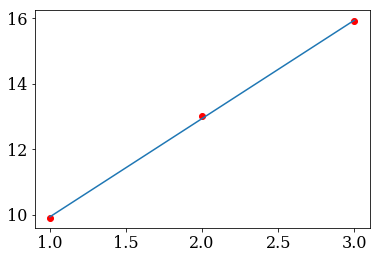

[ 5.55  5.62]


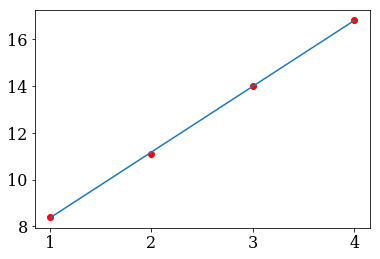

[ 5.69  4.82]


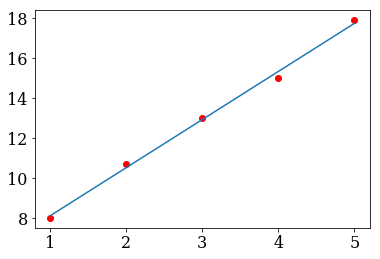

In [81]:
openlambdas = w.find_lambda(allopen)

[ 4.7  8.5]


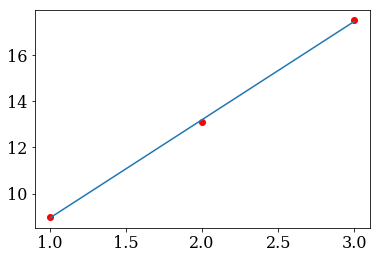

[ 4.86666667  7.3       ]


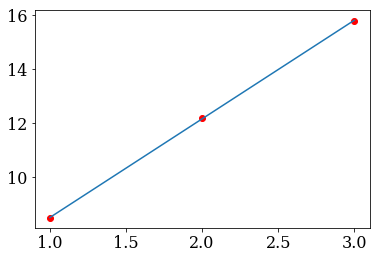

[ 4.7   6.64]


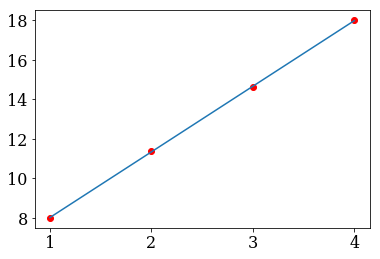

[ 7.33333333  5.9       ]


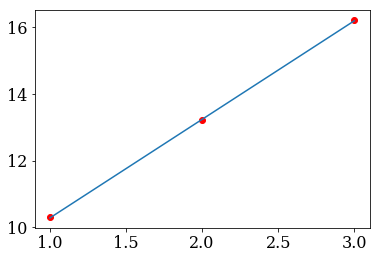

[ 6.45  5.6 ]


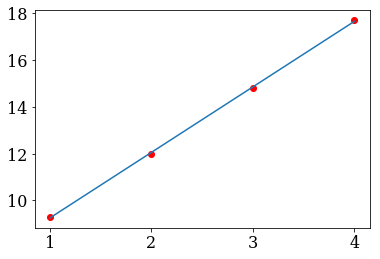

[ 7.55  5.06]


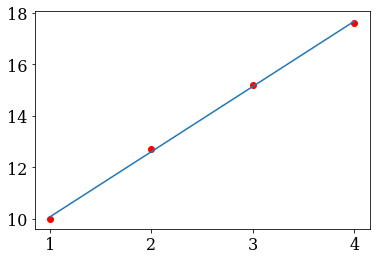

In [82]:
shutlambdas = w.find_lambda(allshorted)

In [83]:
freqs = np.array([7.5, 7.75, 8, 8.25, 8.5, 9])*10e6

In [84]:
doublefreqs = np.array([7.5, 7.5, 7.75, 7.75, 8, 8, 8.25, 8.25, 8.5, 8.5, 9, 9])*10e6

In [85]:
lambdas = const.c/freqs

In [86]:
doublelambdas = const.c/doublefreqs

In [87]:
shutlambdas

[8.5000000000163531,
 7.3000000000137399,
 6.640000000012301,
 5.9000000006734972,
 5.6000000000100325,
 5.0600000000088565]

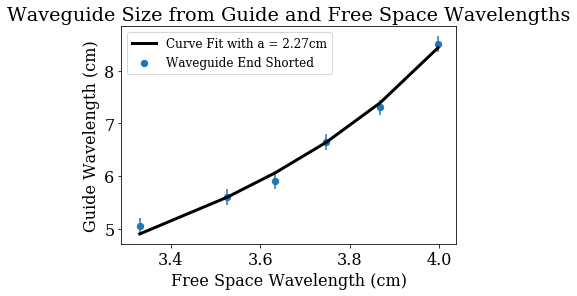

In [88]:
plt.plot(lambdas, lambdag(lambdas, 2.27), 'k-', label='Curve Fit with a = 2.27cm', linewidth=3)
#plt.scatter(lambdas, openlambdas, marker = 's', s=40, label='Waveguide End Open')
plt.scatter(lambdas, shutlambdas, marker = 'o', s=40, label='Waveguide End Shorted')
#plt.errorbar(lambdas, openlambdas, 0.1, marker = 's', markersize = 5, fmt='none')
plt.errorbar(lambdas, shutlambdas, 0.15, marker = 'o', markersize = 8, fmt='none')
plt.title('Waveguide Size from Guide and Free Space Wavelengths')
plt.xlabel('Free Space Wavelength (cm)')
plt.ylabel('Guide Wavelength (cm)')
plt.rc('font', size=14)
plt.rc('axes', titlesize=14)
plt.legend(prop = {'size':12})
plt.savefig('WaveguideAFit.pdf', bbox_inches='tight')
plt.show()
## 22.8 mm

In [89]:
openlambdas

[8.400000000016135,
 7.4000000000139519,
 6.500000000011994,
 5.9999999999999991,
 5.6200000004081803,
 4.8200000000083305]

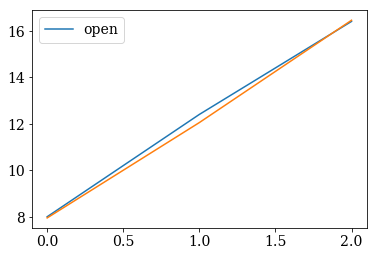

In [90]:
plt.plot(open75, label='open')
plt.plot(shut75 - openlambdas[0]/8)
plt.legend()
plt.show()

In [91]:
freqs*openlambdas/const.c

array([ 2.1014538 ,  1.91299009,  1.7345333 ,  1.65114227,  1.59343568,
        1.44700104])

In [92]:
freqs*shutlambdas/const.c

array([ 2.12647111,  1.88713887,  1.77189247,  1.62362323,  1.58776509,
        1.51905089])

### Calculating VSWR

In [39]:
openmax = 8.4
openmin = 3.9
openvswr = openmax/openmin 
openvswr

2.153846153846154

In [38]:
shutmax = 12
shutmin = 0.8
shutvswr = shutmax/shutmin
shutvswr

15.0

## Cutoff Frequency

In [98]:
f = const.c/(2*2.7*0.1)

In [100]:
f

555171218.5185184